In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('./data/VIXdata.txt',sep='\t')
df.head()

,Date vix
0,20010102 29.99
1,20010102 29.99
2,20010103 26.60
3,20010103 26.60
4,20010104 26.97


In [3]:
def prepare_data(path):
    df = pd.read_csv(path)
    df.columns = ['Date_vix']
    df['Date'] = df['Date_vix'].apply(lambda x: x[0:8])
    df['vix'] = df['Date_vix'].apply(lambda x: x[9:])
    df['vix'] = df['vix'].apply(lambda x: str.replace(x, ' ', ''))
    df['vix'] = df['vix'].apply(lambda x: 0.0 if x == '.' else x)
    df['vix'] = df['vix'].astype(float)
    df['log_vix'] = np.log(df['vix'])
    df['Date'] = pd.to_datetime(df['Date'])
    return df
df = prepare_data('./data/VIXdata.txt')
df.head()

d:\Users\adam\anaconda3\envs\papers\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Date_vix,Date,vix,log_vix
0,20010102 29.99,2001-01-02,29.99,3.400864
1,20010102 29.99,2001-01-02,29.99,3.400864
2,20010103 26.60,2001-01-03,26.60,3.280911
3,20010103 26.60,2001-01-03,26.60,3.280911
4,20010104 26.97,2001-01-04,26.97,3.294725


In [4]:
df = df.drop_duplicates()
df.head()

,Date_vix,Date,vix,log_vix
0,20010102 29.99,2001-01-02,29.99,3.400864
2,20010103 26.60,2001-01-03,26.60,3.280911
4,20010104 26.97,2001-01-04,26.97,3.294725
6,20010105 28.67,2001-01-05,28.67,3.355851
8,20010108 29.84,2001-01-08,29.84,3.395850


In [5]:
df = df[df['Date']>='2010-01-01'].reset_index(drop=True)
df.head()

,Date_vix,Date,vix,log_vix
0,20100104 20.04,2010-01-04,20.04,2.997730
1,20100105 19.35,2010-01-05,19.35,2.962692
2,20100106 19.16,2010-01-06,19.16,2.952825
3,20100107 19.06,2010-01-07,19.06,2.947592
4,20100108 18.13,2010-01-08,18.13,2.897568


In [33]:
df = df[df['vix']>0]
df['log_vix_diff'] = df['log_vix'].diff()
df.dropna(inplace=True)
df.head()

,Date_vix,Date,vix,log_vix,log_vix_diff
2,20100106 19.16,2010-01-06,19.16,2.952825,-0.009868
3,20100107 19.06,2010-01-07,19.06,2.947592,-0.005233
4,20100108 18.13,2010-01-08,18.13,2.897568,-0.050024
5,20100111 17.55,2010-01-11,17.55,2.865054,-0.032514
6,20100112 18.25,2010-01-12,18.25,2.904165,0.039111


In [34]:
df.tail()

,Date_vix,Date,vix,log_vix,log_vix_diff
3166,20220725 23.36,2022-07-25,23.36,3.151025,0.014227
3167,20220726 24.69,2022-07-26,24.69,3.206398,0.055373
3168,20220727 23.24,2022-07-27,23.24,3.145875,-0.060523
3169,20220728 22.33,2022-07-28,22.33,3.105931,-0.039944
3170,20220729 21.33,2022-07-29,21.33,3.060115,-0.045817


In [35]:
from scipy.stats import skew,kurtosis
from statsmodels.stats.stattools import jarque_bera
## Q statistics
from statsmodels.tsa.stattools import q_stat,acf 

column='log_vix_diff'
df[column].max(),df[column].min(),df[column].mean()


(0.7682450067910249, -0.35058849788233015, 3.077135597203669e-05)

In [36]:
df[column].std()

0.07935582092115077

In [37]:
df[column].skew()


1.1359756052998597

In [38]:
kurtosis(df[column])


6.166692154957172

In [39]:
jarque_bera(df[column])


(5696.816478860299, 0.0, 1.1354373274380574, 9.166692154957172)

In [40]:

q_stat(df[column],df[column].shape[0])



d:\Users\adam\anaconda3\envs\papers\lib\site-packages\statsmodels\tsa\stattools.py:558: RuntimeWarning: divide by zero encountered in true_divide
  * np.cumsum((1.0 / (nobs - np.arange(1, len(x) + 1))) * x ** 2)


(array([3.08567067e-01, 3.95371163e-01, 8.33045511e+00, ...,
        3.83321171e+05, 3.99323982e+05,            inf]),
 array([0.57856082, 0.82062783, 0.03965378, ..., 0.        , 0.        ,
        0.        ]))

In [41]:
df[column].skew()

1.1359756052998597

In [42]:

skew(df[column])

1.1354373274380574

In [43]:
kurtosis(df[column])

6.166692154957172

In [44]:
jarque_bera(df[column])

(5696.816478860299, 0.0, 1.1354373274380574, 9.166692154957172)

In [19]:


# acf(df[df['vix']>0]['vix'],nlags=10)

In [45]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(df[column], lags=[10], return_df=True) #Q(10)

,lb_stat,lb_pvalue
10,40.945596,0.000012


In [46]:
sm.stats.acorr_ljungbox(df[column], lags=[20], return_df=True) #Q(20)

,lb_stat,lb_pvalue
20,49.594266,0.000253


In [47]:
from statsmodels.tsa.stattools import adfuller
adfuller(df[column],maxlag=50)

(-23.363793625501298,
 0.0,
 7,
 3158,
 {'1%': -3.4324223949823685,
  '5%': -2.8624556569780975,
  '10%': -2.5672574254233744},
 -6957.583705892843)

In [48]:
from arch.unitroot import PhillipsPerron
pp = PhillipsPerron(df[column])
pp.summary()

Test Statistic,-65.777
P-value,0.000
Lags,29


In [49]:
from statsmodels.tsa.stattools import kpss
kpss(df[column])

d:\Users\adam\anaconda3\envs\papers\lib\site-packages\statsmodels\tsa\stattools.py:2023: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


(0.013600826026887957,
 0.1,
 23,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [27]:
df.shape 

(3170, 5)

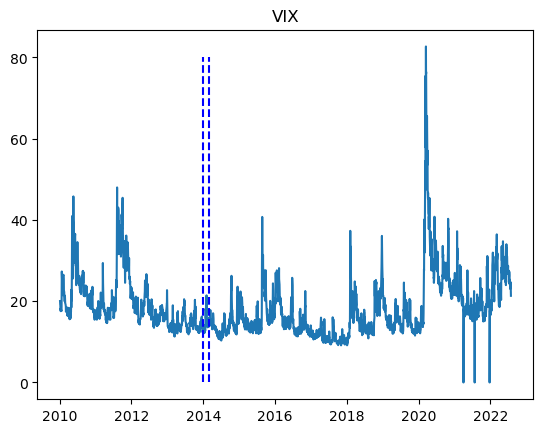

In [8]:
import datetime 
plt.plot(df['Date'],df['vix'])
plt.vlines(datetime.datetime.strptime('2014-01-02','%Y-%m-%d'),0,80,linestyles ="dashed", colors ="b")
plt.vlines(datetime.datetime.strptime('2014-03-03','%Y-%m-%d'),0,80,linestyles ="dashed", colors ="b")
plt.title("VIX")
plt.show()

In [9]:
import datetime 
datetime.datetime.strptime('2022-07-25','%Y-%m-%d')

datetime.datetime(2022, 7, 25, 0, 0)

In [10]:
df[df['Date']>='2014-03-01']

,Date_vix,Date,vix,log_vix
1046,20140303 16.00,2014-03-03,16.00,2.772589
1047,20140304 14.10,2014-03-04,14.10,2.646175
1048,20140305 13.89,2014-03-05,13.89,2.631169
1049,20140306 14.21,2014-03-06,14.21,2.653946
1050,20140307 14.11,2014-03-07,14.11,2.646884
...,...,...,...,...
3166,20220725 23.36,2022-07-25,23.36,3.151025
3167,20220726 24.69,2022-07-26,24.69,3.206398
3168,20220727 23.24,2022-07-27,23.24,3.145875
3169,20220728 22.33,2022-07-28,22.33,3.105931


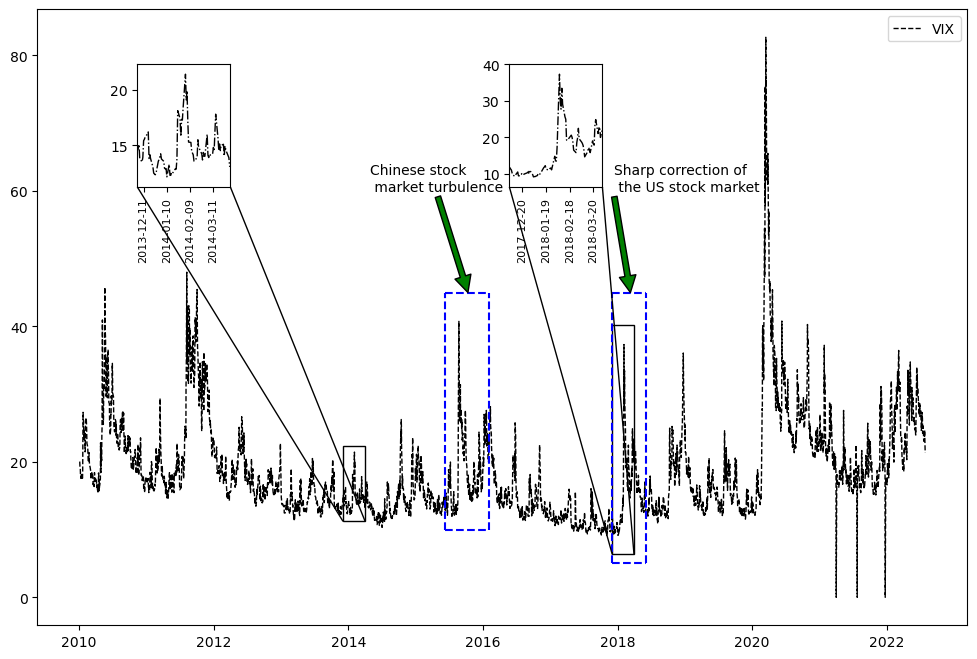

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.ticker as ticker
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(20))
# 准备数据
x = df['Date']
y_1 = df['vix']



# 绘图
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(x, y_1, color='k', linestyle='--', linewidth=1)
ax.vlines(datetime.datetime.strptime('2015-06-12','%Y-%m-%d'),10,45,linestyles ="dashed", colors ="b")
ax.vlines(datetime.datetime.strptime('2016-02-03','%Y-%m-%d'),10,45,linestyles ="dashed", colors ="b")
ax.hlines(10,datetime.datetime.strptime('2015-06-12','%Y-%m-%d'),datetime.datetime.strptime('2016-02-03','%Y-%m-%d'),linestyles ="dashed", colors ="b")
ax.hlines(45,datetime.datetime.strptime('2015-06-12','%Y-%m-%d'),datetime.datetime.strptime('2016-02-03','%Y-%m-%d'),linestyles ="dashed", colors ="b")
ax.annotate("Chinese stock \n market turbulence", xy=(datetime.datetime.strptime('2015-10-12','%Y-%m-%d'),45),
            xytext=(datetime.datetime.strptime('2014-05-01','%Y-%m-%d'),60),arrowprops =dict(facecolor='green'))

ax.vlines(datetime.datetime.strptime('2017-12-01','%Y-%m-%d'),5,45,linestyles ="dashed", colors ="b")
ax.vlines(datetime.datetime.strptime('2018-06-03','%Y-%m-%d'),5,45,linestyles ="dashed", colors ="b")
ax.hlines(5,datetime.datetime.strptime('2017-12-01','%Y-%m-%d'),datetime.datetime.strptime('2018-06-03','%Y-%m-%d'),linestyles ="dashed", colors ="b")
ax.hlines(45,datetime.datetime.strptime('2017-12-01','%Y-%m-%d'),datetime.datetime.strptime('2018-06-03','%Y-%m-%d'),linestyles ="dashed", colors ="b")
ax.annotate("Sharp correction of\n the US stock market", xy=(datetime.datetime.strptime('2018-03-12','%Y-%m-%d'),45),
            xytext=(datetime.datetime.strptime('2017-12-12','%Y-%m-%d'),60),arrowprops =dict(facecolor='green'))




ax.legend(labels=["VIX"], ncol=3)

# 嵌入绘制局部放大图的坐标系
axins = inset_axes(ax, width="10%", height="20%",loc='lower left',
                   bbox_to_anchor=(0.1, 0.7, 1, 1),
                   bbox_transform=ax.transAxes)

# 在子坐标系中绘制原始数据
axins.plot(x, y_1, color='k', linestyle='-.', linewidth=1)

# 设置放大区间
zone_left =1006
zone_right = 1046

# 坐标轴的扩展比例（根据实际数据调整）
x_ratio = 0.5 # x轴显示范围的扩展比例
y_ratio = 0.1 # y轴显示范围的扩展比例

# X轴的显示范围
xlim0 = x[zone_left]-(x[zone_right]-x[zone_left])*x_ratio
xlim1 = x[zone_right]+(x[zone_right]-x[zone_left])*x_ratio

# Y轴的显示范围
y = np.hstack((y_1[zone_left:zone_right]))
ylim0 = np.min(y)-(np.max(y)-np.min(y))*y_ratio
ylim1 = np.max(y)+(np.max(y)-np.min(y))*y_ratio

# 调整子坐标系的显示范围
axins.set_xlim(xlim0, xlim1)
axins.set_ylim(ylim0, ylim1)

# 建立父坐标系与子坐标系的连接线
# loc1 loc2: 坐标系的四个角
# 1 (右上) 2 (左上) 3(左下) 4(右下)
mark_inset(ax, axins, loc1=4, loc2=3, fc="none", ec='k', lw=1)
plt.xticks(rotation=90,size=8)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(30))
##############################################################################################

# 嵌入绘制局部放大图的坐标系
axins_1 = inset_axes(ax, width="10%", height="20%",loc='lower left',
                   bbox_to_anchor=(0.5, 0.7, 1, 1),
                   bbox_transform=ax.transAxes)

# 在子坐标系中绘制原始数据
axins_1.plot(x, y_1, color='k', linestyle='-.', linewidth=1)
# 设置放大区间
zone_left_1 =2013
zone_right_1 = 2054



# X轴的显示范围
xlim0 = x[zone_left_1]-(x[zone_right_1]-x[zone_left_1])*x_ratio
xlim1 = x[zone_right_1]+(x[zone_right_1]-x[zone_left_1])*x_ratio

# Y轴的显示范围
y = np.hstack((y_1[zone_left_1:zone_right_1]))
ylim0 = np.min(y)-(np.max(y)-np.min(y))*y_ratio
ylim1 = np.max(y)+(np.max(y)-np.min(y))*y_ratio

# 调整子坐标系的显示范围
axins_1.set_xlim(xlim0, xlim1)
# axins_1.set_xticks(x[zone_left_1:zone_right_1],rotation=90)
axins_1.set_ylim(ylim0, ylim1)


# 建立父坐标系与子坐标系的连接线
# loc1 loc2: 坐标系的四个角
# 1 (右上) 2 (左上) 3(左下) 4(右下)
mark_inset(ax, axins_1, loc1=4, loc2=3, fc="none", ec='k', lw=1)
plt.xticks(rotation=90,size=8)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(30))
# 显示
plt.show()

In [12]:
x[2]

Timestamp('2010-01-06 00:00:00')

In [13]:
x[0]

Timestamp('2010-01-04 00:00:00')

In [14]:
x.index(x[2])

TypeError: 'RangeIndex' object is not callable

In [15]:
x[2]

Timestamp('2010-01-06 00:00:00')

In [16]:
aa = [1,2,3]

In [18]:
aa.index(2)

1

In [66]:
x_ = list(x)
x_.index(datetime.datetime.strptime('2018-01-02','%Y-%m-%d')) 

2013

In [1]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.normal(0,1,size=(10,3)),columns=['a','b','c'])

In [3]:
df.to_latex()

C:\Users\gaoxc\AppData\Local\Temp\ipykernel_3736\1669264725.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex()


'\\begin{tabular}{lrrr}\n\\toprule\n{} &         a &         b &         c \\\\\n\\midrule\n0 &  0.774014 & -0.481054 & -0.541687 \\\\\n1 &  0.773067 &  0.474495 & -1.088093 \\\\\n2 &  0.570071 &  1.003325 & -0.917580 \\\\\n3 &  0.870415 & -0.920559 &  0.626824 \\\\\n4 &  0.190671 &  0.040934 &  0.854994 \\\\\n5 & -1.259004 & -0.645843 & -0.540950 \\\\\n6 & -2.130448 & -0.571197 &  1.269486 \\\\\n7 & -1.389794 &  0.996258 & -1.578156 \\\\\n8 &  0.341951 &  0.316749 & -1.005123 \\\\\n9 & -0.475077 & -0.227695 & -0.612767 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [4]:
df

,a,b,c
0,0.774014,-0.481054,-0.541687
1,0.773067,0.474495,-1.088093
2,0.570071,1.003325,-0.917580
3,0.870415,-0.920559,0.626824
4,0.190671,0.040934,0.854994
5,-1.259004,-0.645843,-0.540950
6,-2.130448,-0.571197,1.269486
7,-1.389794,0.996258,-1.578156
8,0.341951,0.316749,-1.005123
9,-0.475077,-0.227695,-0.612767
